# $K_e$

Plot $K_e$ to show that it is not negative.

In [1]:
import numpy as np
from equation import kappa

data_const = np.loadtxt('const_dom.csv',delimiter=',')

In [2]:
def calculate_kappa(data=data_const):
    kappa_list = []
    for x1,x2 in data[:,1:3]:
        kappa_list.append(kappa(x1,x2))
    return np.stack(kappa_list, axis=1)

kappa_list = np.array(calculate_kappa())

plot

In [3]:
from plot import multi_plot

In [4]:
import scipy.constants as C
# set M0=2 and T=300K
unit_rescale = C.h/(C.k**2*2*300)

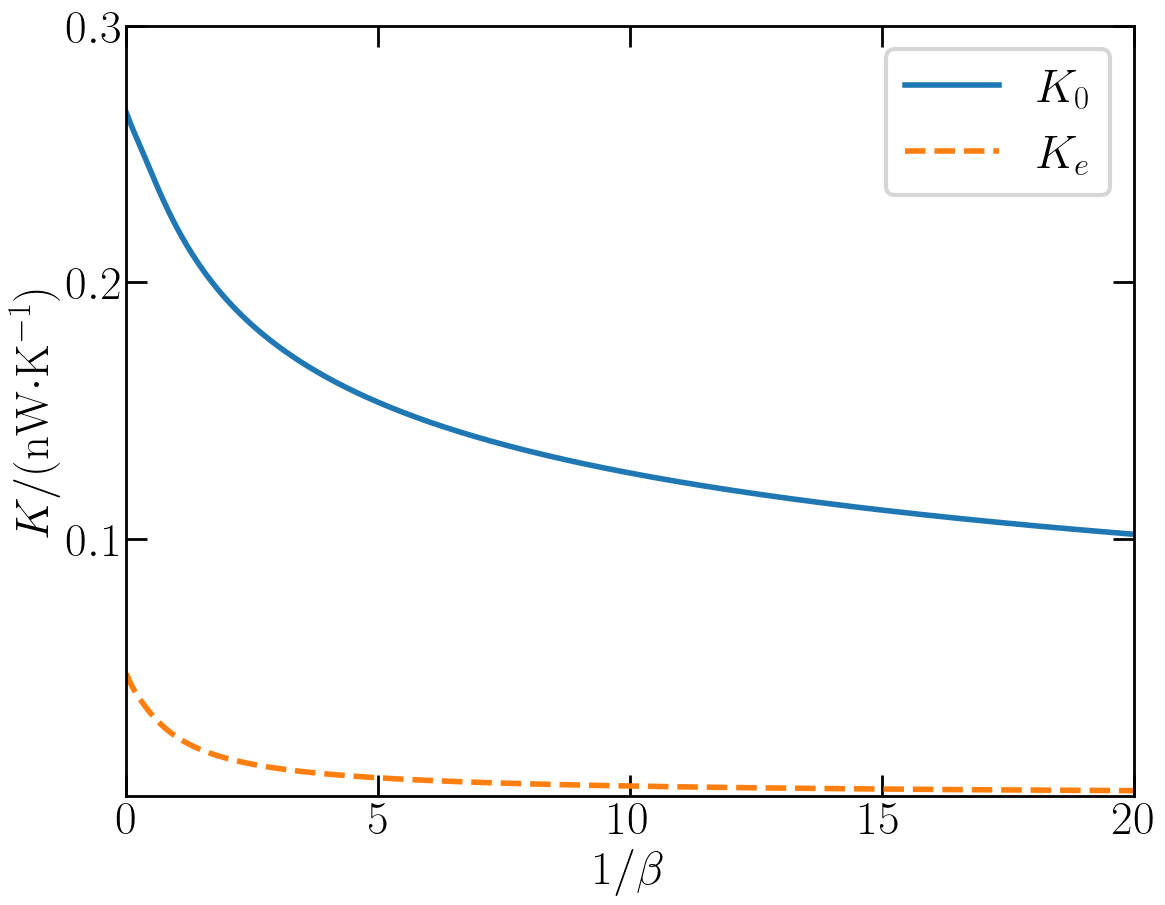

In [7]:
def plot_kappa():
    fig, ax2 = multi_plot(
        data_const[:,0]/2, kappa_list/unit_rescale*1e9,
        [r"$K_0$", r"$K_e$"], ['-', '--']
        )
    ax2.set_xlabel(r"$1/\beta$")
    ax2.set_ylabel(r"$K/(\mathrm{nW{\cdot}K^{-1}})$")
    ax2.set_xlim([0,20])
    ax2.set_ylim([0, .3])
    ax2.set_yticks([.1, .2, .3]) # , .04, .05
    return (fig, ax2)

_ = plot_kappa()
